# Regresión Logística

En este notebook vamos a ir construyendo las funciones que nos permiten hacer regresión logística y las aplicaremos a casos sencillos.

In [164]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Regresión Logística Binaria

*  Empezamos definiendo la función sigmoide:

$$ \sigma(z)= \dfrac{1}{1+e^{-z}} $$

Para poder definir la función en un intervalo 'infinito' usamos la función de `Numpy`:

```python
np.clip(x, min, max)
```


*  Si un valor es menor que min, lo reemplaza por min.
*  Si un valor es mayor que max, lo reemplaza por max.
*  Si está dentro del rango, permanece sin cambios.

In [165]:
def sigmoid(x):    
    x = np.clip(x,-500,500) 

    # ***** TU CODIGO AQUI ********* (1 línea)    
    sigma = 1/(1+np.exp(-x))
    # ***** TU CODIGO AQUI ********* 

    return sigma

#### Dibujar la Función Sigmoide

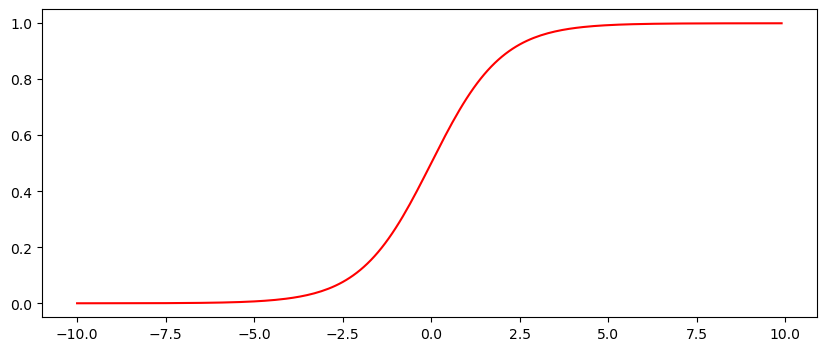

In [166]:
x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(10,4))
plt.plot(x,sigmoid(x), color="red");

### Implementación de las funciones en la Regresión Logística Binaria.

Vamos a implementar 3 funciones:

```python
def logistic_gradient_descent(X,y,learning_rate = 0.001, n_iters = 100):

def predicted_prob(Theta, X):

def predicted(P, thres = 0.5 ):

```

#### `logistic_gradient_descent(X,y,learning_rate = 0.001, n_iters = 100)`
Servirá para implementar el cálculo de los coeficientes de la regresión logística binaria:
$$
\Theta^{k+1} = \Theta^k - \frac{\alpha}{m} \boldsymbol{X}^T \left( \hat{P}  - Y\right)
$$

donde $  \hat{P} = h_\theta(X) = \sigma \left( \boldsymbol{X}\Theta^k \right) $ y $m$ es el número de muestras del conjunto de datos.

Los argumentos de la función son:
* `X`: Matriz de datos de entrada $\boldsymbol{X}$ sin la columna de 1's correspondiente al sesgo ($x_0$).
* `y`: Vector de etiquetas $Y$ para esos datos de entrada.
* `learning_rate`: tasa de aprendizaje $\alpha$.
* `n_iters`: número de iteraciones del descenso de gradiente. Se suele llamar *épocas* o `epochs`.


#### `predicted_prob(Theta, X)`
Una vez conocido el vector de pesos $\Theta$ devuelve el vector de probabilidades $\hat{P} = h_\theta(X)$ para un conjunto de datos de entrada.
$$
\hat{P} = h_\theta(X)  = \sigma \left( \boldsymbol{X}\Theta \right) 
$$

Los argumentos de la función son:
* `Theta`: Vector de pesos calculado previamente
* `X`: Matriz de datos de entrada , $\boldsymbol{X}$, cuya salida queremos predecir sin la columna de 1's correspondiente al sesgo ($x_0$).

#### `predicted(P, thres = 0.5 )`
A partir del vector de probabilidades devuelve la predicción binaria (0,1) según el valor del umbral.

Los argumentos de la función son:
* `P`: Vector de probabilidades calculado previamente
* `thres`: Valor frontera (*threshold*) para separar las clases:

    * $\hat{P} \ge \text{thres} \rightarrow 1$
    * $\hat{P} \lt \text{thres} \rightarrow 0$


In [167]:
def logistic_gradient_descent(X,y,learning_rate = 0.001, n_iters = 100):

    n_samples, n_features = X.shape

    # Empezamos con un valor aleatorio Theta_0.
    # Puedes usar la función np.random.rand() 

    #***** TU CODIGO AQUI ********* (1 línea)
    n_samples, n_features = X.shape
    # Inicializar Theta como vector (bias + features)
    Theta = np.random.randn(n_features + 1) * 0.01 # saca un vector de theta que tenga el tamaño de X + 1 por la columna que se le añade y se multiplica * 0.01 para que sea peq
    #***** TU CODIGO AQUI ********* 
    

    # A continuación añadimos la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    for _ in range(n_iters): # iteramos para calcular theta

        # Calcula el vector de Probabilidades
        # Calcula P = sigmoid(X Theta^k)
        #***** TU CODIGO AQUI ********* (1 línea)
        y_prob = sigmoid(X_1@Theta)
        #***** TU CODIGO AQUI *********

        # Actualiza el valor de Theta = Theta - alpha/m *X^T(P - Y)
        #***** TU CODIGO AQUI ********* (1 línea)
        Theta = Theta - (learning_rate/n_iters)*X_1.T@(y_prob-y)
        #***** TU CODIGO AQUI ********* 

    return Theta
    
def predicted_prob(Theta, X):
     
    n_samples, _ = X.shape

    # Empezamos añadiendo la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    # Calcula P = h_Theta(X) = sigmoid(X Theta)
    #***** TU CODIGO AQUI ********* (1 línea)
    y_prob = sigmoid(X_1@Theta) # en verdad es como la última P sacada en la función del gradiente pero bueno así la
    # sacamos de una
    #***** TU CODIGO AQUI *********

    return y_prob
    
def predicted(P, thres = 0.5):
    
    # Calcula el vector con las predicciones a partir del vector de probabilidades

    #***** TU CODIGO AQUI ********* (1-2 líneas)
    # Binariza: 1 si P > thres, 0 sino (astype(int) da enteros)
    Y_pred = (P>thres).astype(int)
    #***** TU CODIGO AQUI *********
    return Y_pred.flatten()

### Implementación y evaluación en la base de datos del cáncer de pecho.

Vamos a probar nuestras funciones de **Regresión Logística** usando el conjunto de datos del cáncer de mama de Wisconsin (Wisconsin Breast Cancer Dataset). Es un conjunto de datos clásico de clasificación utilizado en aprendizaje automático.

El objetivo es clasificar tumores de mama como malignos (1) o benignos (0).
El *dataset* tiene como características: 
* Número de muestras: 569 (instancias de tumores).
* Número de características: 30 (atributos numéricos extraídos de imágenes digitales de tumores).
* Clases:
    * 0: Benigno
    * 1: Maligno

### Cargamos los datos desde `sklearn`

In [168]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

### Separamos en *train/test* usando `sklearn`

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

### Cálculo de coeficientes de la regresión $\Theta$

Vamos a calcular los coeficientes usando  **Descenso de gradiente**. 


In [170]:
#***** TU CODIGO AQUI ********* (1 línea)
Theta = logistic_gradient_descent(X_train,y_train)
#***** TU CODIGO AQUI *********



### Cálculo del vector de predicciones para el conjunto de *test*

Una vez calculados los coeficientes calculamos el vector de predicciones para el conjunto de datos de *test* que separamos inicialmente.
Primero calculamos el vector de probabilidades asociado al test:
$$
\hat{P} = h_\theta(\boldsymbol{X_{\text{test}}})  = \sigma \left( \boldsymbol{X_{\text{test}}}\Theta \right)
$$
Y comparamos cada componente con el umbral (0.5 por defecto) para determinar su clase 


In [171]:
#***** TU CODIGO AQUI ********* (1-2 líneas)
y_test_predicted = predicted_prob(Theta,X_test)
#***** TU CODIGO AQUI *********

### Evaluación de resultados.

Para determinar como de bien está prediciendo nuestro método vamos a evaluar las tasas de acierto.

Implementa una función que calcule el porcentaje de aciertos dentro del conjunto de *test*
$$
\text{accuracy} = \dfrac{\sum_{j=1}^{m_{\text{test}}} \left( y^j_{\text{test}} == \hat{y}^j_{\text{pred}} \right)}{m_{\text{test}}}
$$ 

In [172]:
def accuracy(y_test_predicted, y_test):
    #***** TU CODIGO AQUI ********* (1-2 líneas)
    valor = np.sum(y_test_predicted == y_test)/len(y_test)
    #***** TU CODIGO AQUI ********* 
    return valor

print(accuracy(y_test_predicted, y_test))

0.0


## Regresión Logística Múltiple

Vamos a empezar implementando la función 
```python
softmax(z):
```
En su versión vectorial, más simple, recibe un vector $\boldsymbol{z}$ y devuelve el vector $\sigma(\boldsymbol{z})$:
$$ 
\begin{align}
\sigma: \mathbb{R}^K & \rightarrow [0,1]^K \\
\boldsymbol{z} & \rightarrow \sigma(\boldsymbol{z}) \text{ siendo } \sigma(z_k)= \dfrac{e^{z_k}}{\sum_{j=1}^K e^{z_j}} \hspace{0.2cm} k=1,\dots, K
\end{align}
$$

En nuestro algoritmo de descenso de gradiente va a recibir una matriz, el producto de $\boldsymbol{X}$ y $\boldsymbol{\Theta}$
$$
X = \begin{pmatrix}
1 & x_1^1 & x_2^1 & \dots & x_n^1\\
1 & x_1^2 & x_2^2 & \dots & x_n^2\\
\vdots & \vdots &  & \dots & \vdots\\
1 & x_1^m & x_2^m & \dots & x_n^m
\end{pmatrix}
\hspace{0.5cm} 
\boldsymbol{\Theta} = 
\begin{pmatrix}
\theta_0^1 & \theta_0^2 &  \dots & \theta_0^K\\
\theta_1^1 & \theta_1^2 &  \dots & \theta_1^K\\
\vdots & \vdots &  \dots & \vdots\\
\theta_n^1 & \theta_n^2 &  \dots & \theta_n^K
\end{pmatrix} 
$$

La matriz producto $\boldsymbol{X} \boldsymbol{\Theta}$ de tamaño $m \times K$  tiene en cada fila $j$ el valor de $\Theta_k^T\boldsymbol{x}^j$ con $k = 1,\dots, K$.

Vamos a aplicar la función `softmax()` a cada fila para crear la matriz de probabilidades $\boldsymbol{\hat{P}}$ que tendra en cada fila, $j$, la probabilidad de pertenencia del dato de entrada $j$ a la clase correspondiente (columna).

Intentamos implementar la función `softmax(Z)` de esa manera:

In [173]:
def softmax(Z):

    # Primero calculamos el numerador que es simplemente e^Z siendo Z una matriz
    #***** TU CODIGO AQUI ********* (1 línea)
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Estabilidad numérica
    #***** TU CODIGO AQUI ********* 

    # Ahora calculamos la suma de la matriz por filas y dividimos los elementos de cada fila por la suma correspondiente
    # Puedes usar np.sum(M, axis=1, keepdims=True) para asegurar que la suma por filas se mantenga con la misma dimensión que la entrada
    #***** TU CODIGO AQUI ********* (1-2 líneas)
    soft = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)   # División fila a fila
    #***** TU CODIGO AQUI ********* 

    return soft

Vamos a implementar 3 funciones:

```python
def logistic_gradient_descent(X,y,learning_rate = 0.001, n_iters = 100):

def predicted_prob(Theta, X):

def predicted(P, thres = 0.5 ):

```

`logistic_gradient_descent(X,Y,learning_rate = 0.001, n_iters = 100)`

Servirá para implementar el método de descenso de gradiente para calcular el valor de la matriz de coeficientes $\boldsymbol{\Theta}$ que minimiza la función de costede entropía cruzada categórica.

Es decir, la expresión en su forma matricial:
$$
\boldsymbol{\Theta}^{\text{epoch}+1} := \boldsymbol{\Theta}^{\text{epoch}} - \dfrac{\alpha }{m} \boldsymbol{X^T}\left(\boldsymbol{\hat{P}}- \boldsymbol{Y}  \right)
$$


Si hacemos un análisis dimensional de la expresión:

* $\boldsymbol{X} \in \cal{M}_{m \times (n+1)} \longrightarrow \boldsymbol{X^T} \in \mathbf{M}_{(n+1) \times m}$
* $ \boldsymbol{\hat{P}}=\sigma\left(\boldsymbol{X} \boldsymbol{\Theta}\right) \in \mathbf{M}_{m \times K}$
* $ \boldsymbol{Y} \in \mathbf{M}_{m \times K}$

Por tanto $\boldsymbol{X^T}\left(\boldsymbol{\hat{P}}- \boldsymbol{Y}  \right) \in \mathbf{M}_{(n+1) \times K} $ que es el tamaño de la matriz  de coeficientes $\boldsymbol{\Theta}$

Los argumentos de la función son:
* `X`: Matriz de datos de entrada $\boldsymbol{X}$ sin la columna de 1's correspondiente al sesgo ($x_0$) que tendremos que añadir.
* `Y`: Matriz de etiquetas $\bar{Y}$ para esos datos de entrada.
* `learning_rate`: tasa de aprendizaje $\alpha$.
* `n_iters`: número de iteraciones del descenso de gradiente. Se suele llamar *épocas* o `epochs`.



In [174]:
def logistic_gradient_descent(X,Y,learning_rate = 0.0001, n_iters = 100):

    # Primero asignamos variables a las dimensiones del problema
    n_samples, n_features = X.shape
    _,n_classes = Y.shape

    # Empezamos con un valor aleatorio para la matriz Theta_0.
    # Puedes usar la función np.random.randn() 

    #***** TU CODIGO AQUI ********* (1 línea)
    Theta = np.random.randn(n_features + 1,n_classes)
    #***** TU CODIGO AQUI ********* 
    
    # A continuación añadimos la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    for _ in range(n_iters):
        
        # Calcula P = softmax(X Theta^k) lo llamaremos Y_prob
        #***** TU CODIGO AQUI ********* (1 línea)
        Y_prob = softmax(X_1@Theta)
        #***** TU CODIGO AQUI *********

        # Actualiza el valor de Theta
        #***** TU CODIGO AQUI ********* (1 línea)
        Theta = Theta - learning_rate/n_iters*X_1.T@(Y_prob-Y)
        #***** TU CODIGO AQUI ********* 
  
    return Theta

`predicted_prob(Theta, X)`

Una vez conocida la matriz de pesos $\boldsymbol{\Theta}$ devuelve la matriz de probabilidades $\boldsymbol{\hat{P}} = h_\Theta(X)$ de tamaño $m \times K$ para un conjunto de datos de entrada.
$$
\boldsymbol{\hat{P}} = \sigma \left( \boldsymbol{X}\boldsymbol{\Theta} \right) 
$$

Los argumentos de la función son:
* `Theta`: Matriz de pesos calculada previamente
* `X`: Matriz de datos de entrada , $\boldsymbol{X}$, cuya salida queremos predecir. En la entrada $\boldsymbol{X}$ no tiene la columna de 1's correspondiente al sesgo ($x_0$).

Multiplica esas matrices y a cada fila le aplica la función *softmax* para calcular la matriz $\boldsymbol{\hat{P}}$ de tamaño $m \times K$ que tiene por elementos:
$$
\hat{p}_k^j=\sigma(\Theta_k^T\boldsymbol{x}^j) 
$$

In [175]:
def predicted_prob(Theta, X):
    # Primero asignamos variables a las dimensiones del problema
    n_samples, n_features = X.shape

    # A continuación añadimos la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    # Calcula P = softmax(X Theta^k) lo llamaremos Y_prob
    #***** TU CODIGO AQUI ********* (1 línea)
    Y_prob = softmax(X_1@Theta)
    #***** TU CODIGO AQUI *********

    return Y_prob

`predicted_class(P)`
A partir de la matriz de probabilidades  calcula un vector de tamaño $m$ que contiene, para cada dato de entrada, la clase con mayor probabilidad de pertenencia.

Los argumentos de la función son:
* `P`: Matriz de probabilidades calculada previamente

In [176]:
def predicted_class(P):

    # Calcula el vector con las predicciones a partir del vector de probabilidades

    #***** TU CODIGO AQUI ********* (1-2 líneas)
    Y_pred = np.argmax(P, axis=1)
    #***** TU CODIGO AQUI *********
    
    return Y_pred

### Implementación y evaluación en *Iris DataSet*.

Vamos a probar nuestras funciones de **Regresión Logística Múltiple** usando el conjunto de datos de clasificación de flores de *Iris DataSet*.
Este conjunto de datos contiene la información de las anchuras y longitudes de los pétalos y sépalos de 3 tipos diferentes de plantas dentro del género iris (Setosa, Versicolor y Virginica).

<style>
  .image-container {
    text-align: center; /* Centrar la imagen dentro del contenedor */
  }

  .image-container img {
    width: 80px; /* Ajustar el tamaño de las imágenes */
  }

  table {
    border-collapse: collapse; /* Eliminar bordes entre celdas */
    margin: 0 auto; /* Centrar la tabla en la página */
  }

  td {
    border: none; /* Eliminar bordes de las celdas */
    padding: 10px; /* Añadir espacio dentro de las celdas */
    text-align: center; /* Centrar el contenido dentro de la celda */
    vertical-align: middle; /* Alinear verticalmente el contenido */
  }
</style>

<table style="border: 0">
  <tr>
    <td>
      <div class="image-container">
        <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" target="_parent">
          <img src="https://en.wikipedia.org/static/images/icons/wikipedia.png" alt="Iris en Wikipedia">
        </a>
      </div>
      <br>Iris en Wikipedia
    </td>
    <td>
      <div class="image-container">
        <a target="_blank" href="https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html">
          <img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="Iris en scikit-learn">
        </a>
      </div>
      <br>Iris en scikit-learn
    </td>
  </tr>
</table>



### Cargamos el conjunto de datos.

Este conjunto de datos esta incluido en `sklearn.datasets` como una clase que tiene sus propios métodos para descargarlo y visualizarlo.

In [177]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Los datos de entrada, longitudes y anchos de los pétalos y sépalos de las 3 especies están almacenados en un numpy.ndarray de 150x4 llamado *data*.
Las 150 filas son diferentes muestras mientras que las columnas corresponden respectivamente a: 
* Largo del sépalo
* Ancho del sépalo
* Largo del pétalo 
* Ancho del pétalo.

La columna *target* contiene el identificador de clase:

* 0 - Iris Setosa
* 1 - Iris Versicolor 
* 2 - Iris Virginica.

In [178]:
X = iris["data"]
y = iris["target"]

### Separamos en *train/test* usando `sklearn`

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para crear la matriz $\bar{Y}$ de etiquetas, empleamos:
```python
Y_matrix = np.eye(3)[y]
```
Crea una matriz de 3 columnas y tantas filas como elementos tenga $y$. Cada fila de la matriz $Y_{matrix}$ será la fila de la matriz identidad que determine el correspondiente valor de $y$.
Si $y=(0,0,1,2,2)$ la matriz sera:

$$
Y_{matrix} =  
\begin{pmatrix}
1 & 0 & 0\\
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
0 & 0 & 1
\end{pmatrix}
$$

In [180]:
Y_matrix_train = np.eye(3)[y_train]
print(np.shape(Y_matrix_train))
Y_matrix_test = np.eye(3)[y_test]
print(np.shape(X_train))

(120, 3)
(120, 4)


### Cálculo de la matriz de coeficientes de la regresión $\Theta$

Vamos a calcular los coeficientes usando  **Descenso de gradiente**. 

In [181]:
#***** TU CODIGO AQUI ********* (1 línea)
Theta = logistic_gradient_descent(X_train,Y_matrix_train)
#***** TU CODIGO AQUI *********


### Cálculo de la matriz de predicciones para el conjunto de *test*

Una vez calculados los coeficientes calculamos la matriz de predicciones para el conjunto de datos de *test* que separamos inicialmente.

In [182]:
#***** TU CODIGO AQUI ********* (1-2 líneas)
y_test_prob = predicted_prob(Theta,X_test)
y_test_predicted = predicted_class(y_test_prob)
#***** TU CODIGO AQUI *********

### Evaluación de resultados.

Para determinar como de bien está prediciendo nuestro método vamos a evaluar las tasas de acierto con la misma función que usamos en la clasificación binaria.

In [183]:
acc = accuracy(y_test_predicted, y_test)
print(acc)

0.3333333333333333


### Extra

Si lo has hecho bien el porcentaje de acierto debería ser el 100%. 
Para visualizar un poco mejor el conjunto y forzar el fallo en nuestro clasificador vamos a usar menos características, lo que hará que el modelo no acierte en los casos más críticos y nos permitirá visualizarlo mejor.

Vamos a emplear unicamente dos características:
* Largo del pétalo
* Ancho del pétalo

In [184]:
X = iris["data"][:,(2,3)] 
y = iris["target"]

#### Separamos en *train/test* usando `sklearn` pero usando menos puntos de entrenamiento.

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
# Matriz de etiquetas
Y_matrix_train = np.eye(3)[y_train]
Y_matrix_test = np.eye(3)[y_test]

### Cálculo de la matriz de coeficientes de la regresión $\Theta$

In [186]:
#***** TU CODIGO AQUI ********* (1 línea)
Theta = logistic_gradient_descent(X_train,Y_matrix_train)
#***** TU CODIGO AQUI *********

### Cálculo de la matriz de predicciones para el conjunto de *test*

In [187]:
#***** TU CODIGO AQUI ********* (1-2 líneas)
y_test_prob = predicted_prob(Theta,X_test)
y_test_predicted = predicted_class(y_test_prob)
#***** TU CODIGO AQUI *********

### Visualización de los datos y las predicciones según las variables predictoras

In [188]:
print(accuracy(y_test_predicted, y_test))

0.32222222222222224


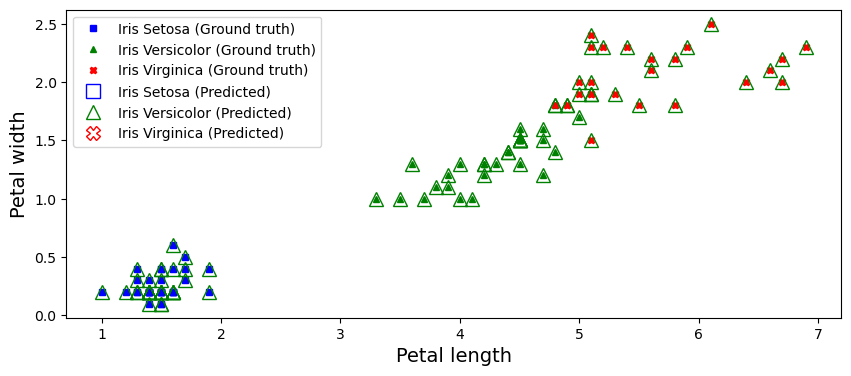

In [189]:
l_a = np.min(iris["data"][:,2])
l_b = np.max(iris["data"][:,2])
x_total = np.linspace(l_a-1, l_b+1, 100)


plt.figure(figsize=(10, 4))
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "bs", markersize=5, label ="Iris Setosa (Ground truth)")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "g^", markersize=5, label ="Iris Versicolor (Ground truth)")
plt.plot(X_test[y_test==2, 0], X_test[y_test==2, 1], "rX", markersize=5, label ="Iris Virginica (Ground truth)")
plt.plot(X_test[y_test_predicted==0, 0], X_test[y_test_predicted==0, 1], "bs", markersize=10, fillstyle= 'none', label ="Iris Setosa (Predicted)")
plt.plot(X_test[y_test_predicted==1, 0], X_test[y_test_predicted==1, 1], "g^", markersize=10, fillstyle= 'none', label ="Iris Versicolor (Predicted)")
plt.plot(X_test[y_test_predicted==2, 0], X_test[y_test_predicted==2, 1], "rX", markersize=10, fillstyle= 'none', label ="Iris Virginica (Predicted)")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=10)